In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20, 10))

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()

In [5]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(iris.data, iris.target)

In [6]:
clf

RandomForestClassifier(n_estimators=10)

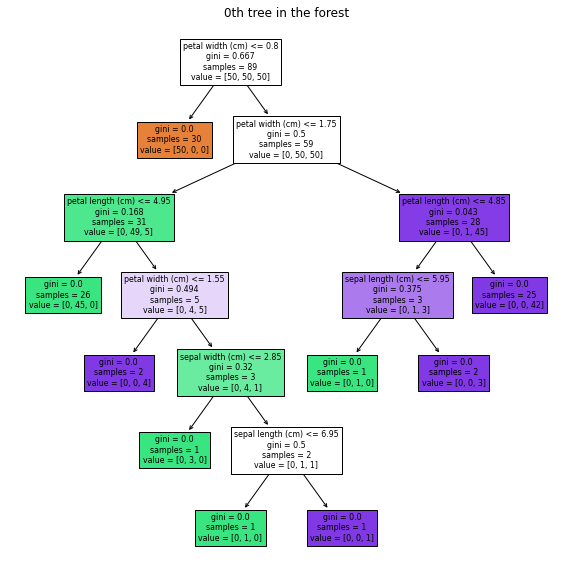

In [7]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 10))
plot_tree(clf[0], feature_names=iris.feature_names, filled=True)
plt.title("0th tree in the forest")
plt.show()

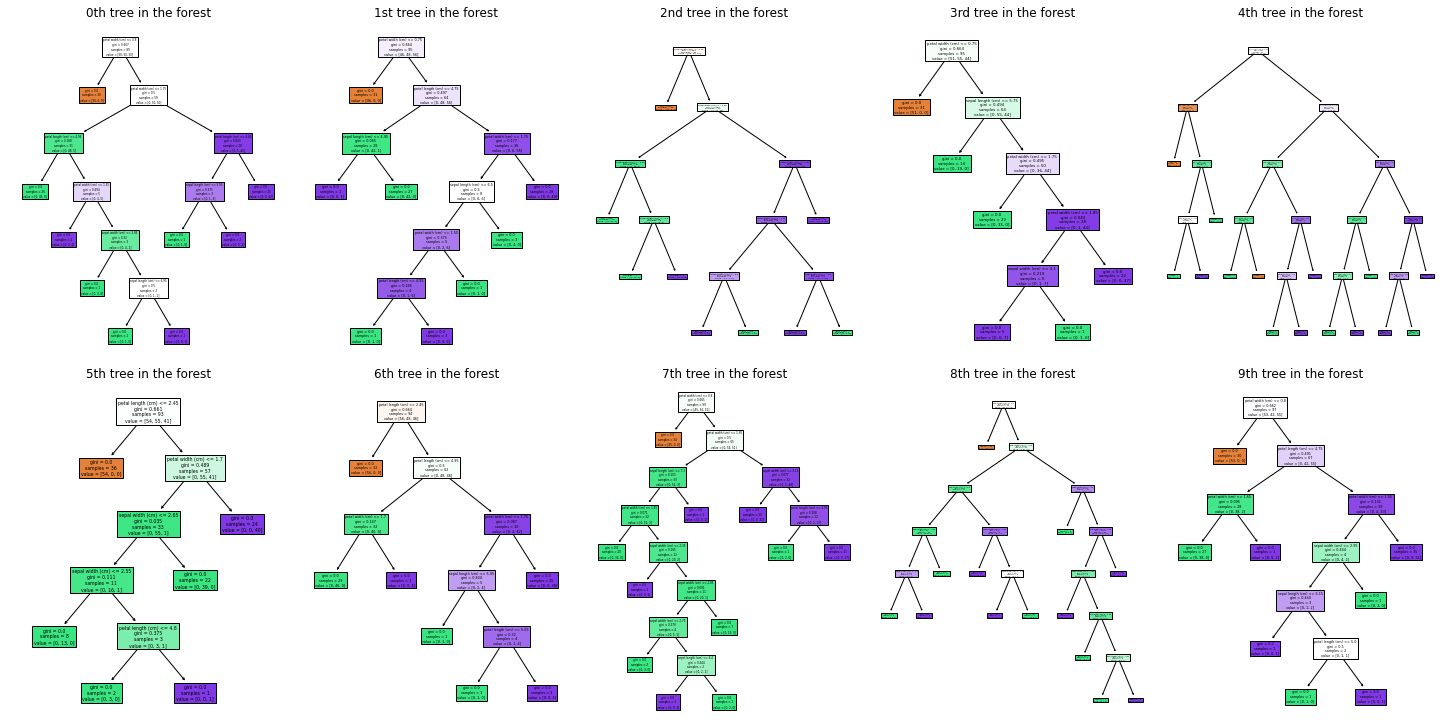

In [8]:
mosaic = """
    ABCDE
    FGHIJ
    """
fig = plt.figure(constrained_layout=True)
ax_dict = fig.subplot_mosaic(mosaic)

def make_ordinal(n):
    '''
    Convert an integer into its ordinal representation::

        make_ordinal(0)   => '0th'
        make_ordinal(3)   => '3rd'
        make_ordinal(122) => '122nd'
        make_ordinal(213) => '213th'

    https://stackoverflow.com/questions/9647202/ordinal-numbers-replacement
    '''
    n = int(n)
    if 11 <= (n % 100) <= 13:
        suffix = 'th'
    else:
        suffix = ['th', 'st', 'nd', 'rd', 'th'][min(n % 10, 4)]
    return str(n) + suffix

for i, ax in enumerate(ax_dict.values()):
    plot_tree(clf[i], ax=ax, feature_names=iris.feature_names, filled=True)
    ax.title.set_text(f"{make_ordinal(i)} tree in the forest")
plt.show()